In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import openpyxl

C:\Users\Gavrin Gleb\anaconda3\lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_excel('Dataset.xlsx')

In [3]:
df.drop('mileage(km/ltr/kg)', axis=1, inplace=True)

In [4]:
df['selling_price'] = df['selling_price'].apply(lambda x: x * 0.011989)

In [5]:
df['seats'] = df['seats'].fillna(float(5))

In [6]:
df.loc[df["max_power"] == " ", "max_power"] = 85
df['max_power'] = df['max_power'].fillna(df['max_power'].median())
df['max_power'] = df['max_power'].astype(float)
df['engine'] = df['engine'].fillna(df['engine'].median())

In [7]:
df['Class'] = df.apply(lambda row: 'Mass market' if (row.engine >=1400 and row.max_power >=10) else 'Cheap' , axis = 1)
 
df.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,seats,Class
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,5.0,Cheap
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,5.0,Mass market
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,5.0,Mass market
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,5.0,Cheap
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,5.0,Cheap


In [8]:
df[['Fuel', 'Seller_type', 'Transmission', 'Owner', 'CLASS']] = df[['fuel', 'seller_type', 'transmission', 'owner', 'Class']]
df_mod = pd.get_dummies(df, columns=['Fuel', 'Seller_type', 'Transmission', 'Owner', 'CLASS'], drop_first=True, dtype=int)
df_mod.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,...,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,...,0,0,1,0,1,0,0,0,0,0
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,...,0,0,1,0,1,0,1,0,0,1
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,...,0,1,1,0,1,0,0,0,1,1
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,...,0,0,1,0,1,0,0,0,0,0
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,...,0,1,1,0,1,0,0,0,0,0


In [9]:
df_mod['year2'] = df_mod.apply(lambda row: (row.year)**2, axis = 1)
 
df_mod.head()

,name,year,selling_price,km_driven,fuel,seller_type,transmission,owner,engine,max_power,...,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market,year2
0,Maruti Swift Dzire VDI,2014,5395.050,145500,Diesel,Individual,Manual,First Owner,1248.0,74.00,...,0,1,0,1,0,0,0,0,0,4056196
1,Skoda Rapid 1.5 TDI Ambition,2014,4435.930,120000,Diesel,Individual,Manual,Second Owner,1498.0,103.52,...,0,1,0,1,0,1,0,0,1,4056196
2,Honda City 2017-2020 EXi,2006,1894.262,140000,Petrol,Individual,Manual,Third Owner,1497.0,78.00,...,1,1,0,1,0,0,0,1,1,4024036
3,Hyundai i20 Sportz Diesel,2010,2697.525,127000,Diesel,Individual,Manual,First Owner,1396.0,90.00,...,0,1,0,1,0,0,0,0,0,4040100
4,Maruti Swift VXI BSIII,2007,1558.570,120000,Petrol,Individual,Manual,First Owner,1298.0,88.20,...,1,1,0,1,0,0,0,0,0,4028049


In [10]:
y = df_mod['selling_price']

In [11]:
X = df_mod[[
 'year',
 'km_driven',
 'engine',
 'max_power',
 'seats',
 'Fuel_Diesel',
 'Fuel_LPG',
 'Fuel_Petrol',
 'Seller_type_Individual',
 'Seller_type_Trustmark Dealer',
 'Transmission_Manual',
 'Owner_Fourth & Above Owner',
 'Owner_Second Owner',
 'Owner_Test Drive Car',
 'Owner_Third Owner',
 'CLASS_Mass market',
 'year2']]

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42)

In [13]:
X_train

,year,km_driven,engine,max_power,seats,Fuel_Diesel,Fuel_LPG,Fuel_Petrol,Seller_type_Individual,Seller_type_Trustmark Dealer,Transmission_Manual,Owner_Fourth & Above Owner,Owner_Second Owner,Owner_Test Drive Car,Owner_Third Owner,CLASS_Mass market,year2
6518,2019,2560,1199.0,83.81,5.0,0,0,1,1,0,0,0,0,0,0,0,4076361
6144,2013,80000,1198.0,86.80,5.0,0,0,1,1,0,1,0,1,0,0,0,4052169
6381,2011,150000,1396.0,90.00,5.0,1,0,0,1,0,1,1,0,0,0,0,4044121
438,2013,120000,1248.0,74.00,5.0,1,0,0,1,0,1,0,1,0,0,0,4052169
5939,2017,25000,998.0,67.05,5.0,0,0,1,1,0,1,0,0,0,0,0,4068289
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5226,2009,120000,2179.0,120.00,7.0,1,0,0,1,0,1,0,0,0,0,1,4036081
5390,2014,80000,1248.0,74.00,5.0,1,0,0,1,0,1,0,1,0,0,0,4056196
860,2016,35000,1197.0,81.83,5.0,0,0,1,1,0,1,0,0,0,0,0,4064256
7603,2019,27000,1248.0,74.02,5.0,1,0,0,1,0,1,0,0,0,0,0,4076361


In [14]:
from sklearn.linear_model import LinearRegression


y_train = np.array(y_train).reshape(-1, 1)


lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

LinearRegression()

In [15]:
y_test_pred = lin_model.predict(X_test) #ищем предсказанные значения

In [16]:
from sklearn.metrics import mean_squared_error

mean_squared_error(y_test, y_test_pred)

26854430.64639416

In [17]:
from sklearn.metrics import r2_score
 
r2_score(y_test, y_test_pred)

0.7149719237189247

In [18]:
# Функция для того, чтобы на одной картинке смотреть те графики с прогнозами.
def plot_yreal_ypred(y_test, y_train, y_test_pred):
    """
        Рисует картинку для прогнозов регрессии 
    """
    
    margin = 0.1 # отступ на границах
    plt.figure(figsize=(10,5))
    plt.subplot(121)
    plt.scatter(y_train, y_train, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    train_min = min(y_train)
    train_max = max(y_train)
    plt.xlim(train_min - margin, train_max + margin)
    plt.ylim(train_min - margin, train_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Train set', fontsize=20)

    plt.subplot(122)
    plt.scatter(y_test, y_test_pred, color="red", alpha=0.5)
    plt.xlabel('Истинные значения')
    plt.ylabel('Предсказанные значения')
    plt.axis('equal')
    plt.axis('square')
    test_min = min(y_test)
    test_max = max(y_test)
    plt.xlim(test_min - margin, test_max + margin)
    plt.ylim(test_min - margin, test_max + margin)
    plt.plot([-10000, 10000], [-10000, 10000])
    plt.title('Test set', fontsize=20)
    pass

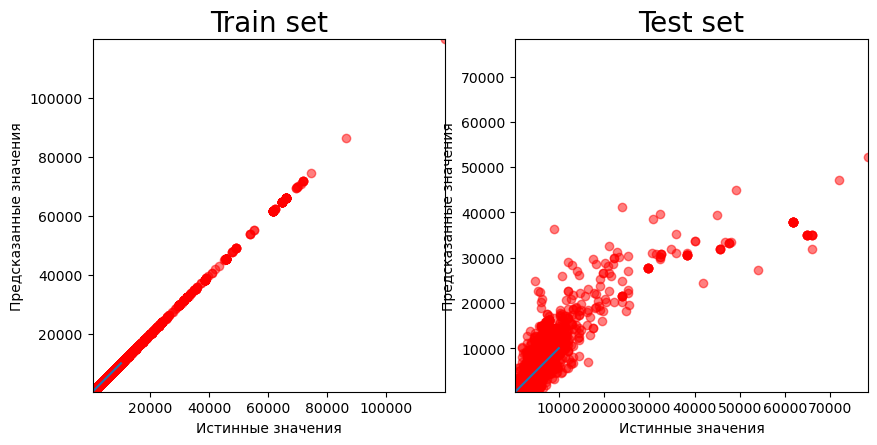

In [19]:
plot_yreal_ypred(y_test, y_train, y_test_pred)